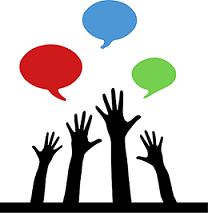

<p style="font-size:22px;"><b>EXPLORATORY DATA ANALYSIS - TERRORISM(TASK-4)</b></p>

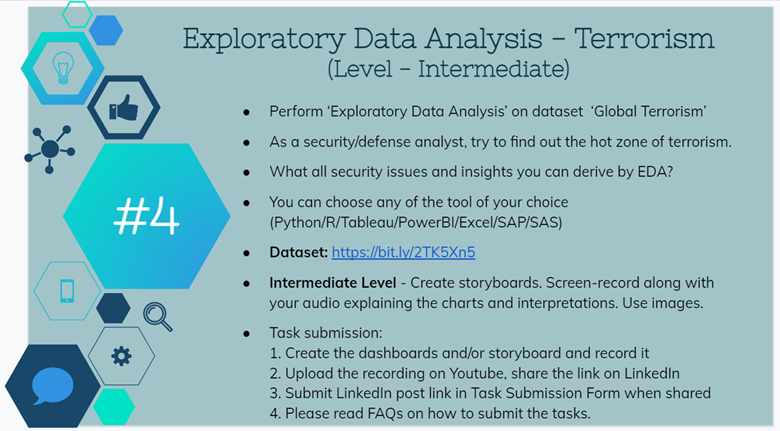

<p style="font-size:21px;"><b>BY: DURGA MUKESH</b></p>

<p style="font-size:21px;"> <b> Problem Statement: </b> </p>
As a security/defence analyst, try to find out the hot zone of terrorism. What all security issues and insights you can derive by EDA?

-----------------------------
<p style="font-size:21px;"> <b> WHAT IS TERRORISM? </b> </p>
Terrorism is, in its broadest sense, the unlawful use of intentional violence to achieve political aims, especially against civilians. It is used in this regard primarily to refer to violence during peacetime or in the context of war against non-combatants (mostly civilians and neutral military personnel).

----------------------
<p style="font-size:21px;"> <b> About Dataset: </b> </p>

1. The Global Terrorism Database

> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

2. Characteristics of the Database

> Contains information on over 180,000 terrorist attacks
Currently the most comprehensive unclassified database on terrorist attacks in the world
Includes information on more than 88,000 bombings, 19,000 assassinations, and 11,000 kidnappings since 1970
Includes information on at least 45 variables for each case, with more recent incidents including information on more than 120 variables
More than 4,000,000 news articles and 25,000 news sources were reviewed to collect incident data from 1998 to 2017 alone


# Importing necessary Libraries:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import io

In [23]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = 'latin1')

D:\Applications\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [24]:
#glimpse of dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [25]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


# Exploratory Data Analysis:

In [ ]:
#Histogram
df.hist(figsize=(25,15))
plt.show()

In [ ]:
#Heat Map
plt.figure(figsize=(15,10))
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

In [ ]:
#Countplot
plt.figure(figsize=(25,10))
sns.countplot(x="iyear", hue="success", data=df)
plt.title('Trend of increase in terrorism from 1970 to 2017',c='white')
plt.show()

In [ ]:
year=df.iyear.value_counts().to_dict()
rate=((year[2017]-year[1970])/year[2017])*100
print(year[1970],'attacks happened in 1970 &',year[2017],'attacks happened in 2017')
print('So the number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

In [ ]:
#CountPlot
plt.figure(figsize=(8,8))
sns.countplot(df.success)
plt.title('Count distribution of successful and unsuccessful attacks from 1970 to 2017',c='Black')
plt.show()

In [ ]:
arr=[((df['success']).value_counts()).max(),((df['success']).value_counts()).min()]
perc=((arr[0]-arr[1])/arr[0])*100

In [ ]:
# Questions:
# i) Number of attacks that were successful and the number of attacks unsuccessful.
#ii) How high is the rate of successful attacks in comparision to that of unsuccessful ones?

print('Ans(i) The number of attacks that were successful were',arr[0],'and',arr[1],'attacks were unsuccuessfull.')
print('Ans(ii) The rate of successful attacks is',np.round(perc,0),'% higher than unsuccessful attacks.')

In [ ]:
pd.crosstab([df.country_txt,df.suicide],[df.success],margins=True).style.background_gradient(cmap='magma')

In [ ]:
pd.crosstab([df.gname,df.suicide],[df.success],margins=True).style.background_gradient(cmap='magma')


In [ ]:
pd.crosstab([df.weaptype1_txt,df.suicide],[df.success],margins=True).style.background_gradient(cmap='magma')

In [ ]:
px.scatter(df,df.nwound,df.nkill,hover_name='country_txt',animation_frame='iyear',animation_group='country_txt',color='suicide',
           size='success',size_max=40,range_color=[0,1],labels={'nkill':'Deaths','nwound':'Casualities'},
           title='Number of casualities vs Killed people in each country for each year')

In [ ]:
terr=df.groupby(['country_txt'],as_index=False).count()

In [ ]:
fig=px.choropleth(terr,locations='country_txt',locationmode='country names',
                  color='iyear',hover_name='country_txt',projection='orthographic',
                  title='Total number of attacks (1970-2017)',labels={'iyear':'Attacks'})
fig.show()

In [ ]:
px.choropleth(terr,locations='country_txt',locationmode='country names'
              ,color='iyear',hover_name='country_txt',title='Total number of attacks (1970-2017)'
             ,labels={'iyear':'Attacks'})

In [ ]:
max_count=terr['iyear'].max()
max_id=terr['iyear'].idxmax()
max_name=terr['country_txt'][max_id]
min_count=terr['iyear'].min()
min_id=terr['iyear'].idxmin()
min_name=terr['country_txt'][min_id]

In [ ]:
print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

<p style="font-size:22px;"><b> THANK YOU </b> </p>